# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [226]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [228]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,691,86,45,71,170,70,6,146,45,19,146,172,321,189,71,10,8,187,191
1,490,108,54,109,189,57,11,220,31,25,174,229,709,214,70,12,23,189,201
2,246,95,36,73,191,73,6,156,41,19,126,184,374,124,71,2,19,199,204
3,665,90,47,85,161,64,10,163,42,20,160,177,389,185,73,9,0,185,195
4,312,82,41,70,155,64,7,148,45,19,138,172,328,152,72,5,17,187,195
5,577,99,54,100,199,62,9,200,33,23,166,222,600,241,70,2,7,189,198
6,381,106,54,100,227,67,4,250,27,27,162,280,923,262,88,5,11,182,182
7,412,80,43,71,133,60,7,150,45,19,146,170,330,176,81,6,15,180,184
8,787,93,37,70,126,52,9,127,53,18,137,156,238,119,71,2,13,191,190
9,70,96,55,98,161,54,10,215,31,24,175,226,683,221,76,3,6,185,193


Methods `describe` and `info` deliver some useful information.

In [229]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.551913,93.910747,44.890710,82.327869,169.553734,61.850638,8.721311,169.023679,40.936248,20.602914,148.136612,189.154827,441.102004,174.932605,72.511840,6.577413,12.295082,189.078324,195.830601
std,238.670205,8.305375,6.192685,16.043906,34.249558,8.694086,5.193054,33.641484,7.870852,2.629644,14.407441,32.117424,179.322785,32.976892,8.150408,5.052996,8.999614,6.267404,7.646769
min,0.000000,73.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,218.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,167.000000,319.000000,150.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,421.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,71.000000,6.000000,10.000000,189.000000,197.000000
75%,626.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,597.000000,198.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [230]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

In [231]:
DEBUG = False

def dbgprint(*args, **kwargs) -> None:
    if DEBUG:
        print(*args, **kwargs)

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[:,1:])
sc_data = scaler.transform(data[:,1:])
X_train, X_test, y_train, y_test = train_test_split(sc_data, target, test_size=0.35)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head(15)

NameError: name 'data' is not defined

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

logit = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logit_param_grid = {
    'C': np.logspace(-4, 4, 50),
    'penalty': ['l1', 'l2']
}

clf = model_selection.GridSearchCV(logit, logit_param_grid, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)
print("Best params:", clf.best_params_)

logit: LogisticRegression = clf.best_estimator_
y_test_pred = logit.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("F1 score:", metrics.f1_score(y_test, y_test_pred, average='macro'))

Best params: {'C': 1.2067926406393288, 'penalty': 'l1'}
Accuracy: 0.797979797979798
F1 score: 0.7960168114365194


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

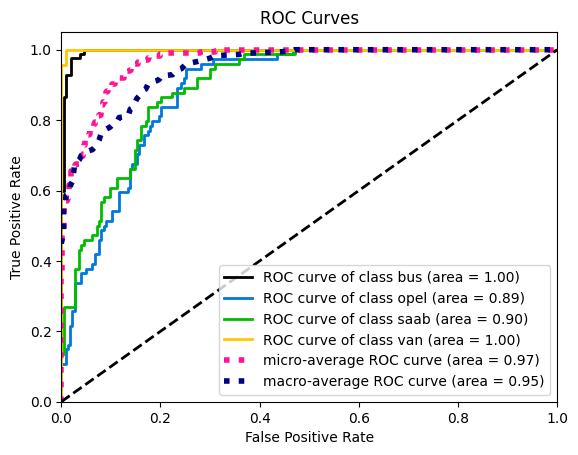

In [234]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

from scikitplot import metrics as skpmetrics

dbgprint(logit.predict_proba(X_test))
skpmetrics.plot_roc(y_test, logit.predict_proba(X_test))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

<AxesSubplot: title={'center': 'PCA 2-D Projection'}, xlabel='First Principal Component', ylabel='Second Principal Component'>

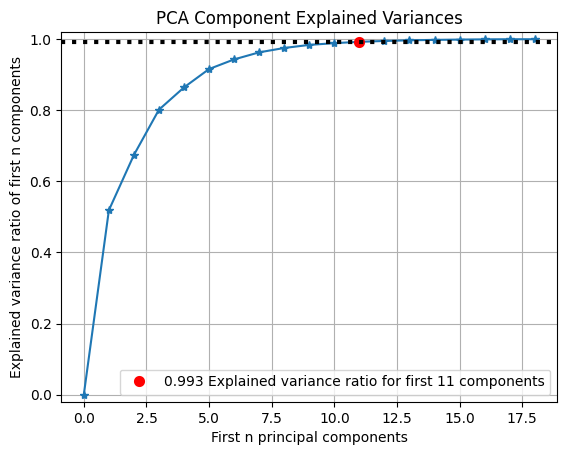

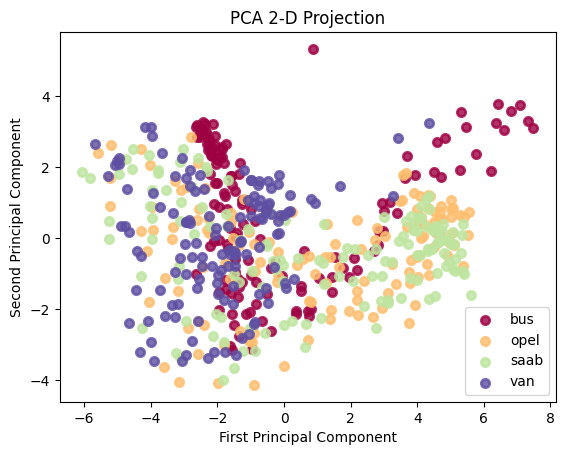

In [235]:
from sklearn import decomposition
from scikitplot import decomposition as skpdecomposition

pca = decomposition.PCA()
pca.fit(X_train)
skpdecomposition.plot_pca_component_variance(pca, target_explained_variance=0.99)
skpdecomposition.plot_pca_2d_projection(pca, X_train, y_train)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

**Answer:** We take first 11 components as they explain up to 99% as a plot above shows. We have already normalized the data, but if we hadn't, we would have to do it before PCA application.

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [236]:
from sklearn.pipeline import Pipeline

pca = decomposition.PCA(n_components = 11)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [237]:
logit = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

clf = model_selection.GridSearchCV(logit, logit_param_grid, n_jobs=-1, cv=10)
clf.fit(X_train_pca, y_train)
print("Best params:", clf.best_params_)

logit: LogisticRegression = clf.best_estimator_
y_test_pred = logit.predict(X_test_pca)
print("Accuracy (no Pipeline):", metrics.accuracy_score(y_test, y_test_pred))
print("F1 score (no Pipeline):", metrics.f1_score(y_test, y_test_pred, average='macro'))

Best params: {'C': 0.18420699693267145, 'penalty': 'l1'}
Accuracy (no Pipeline): 0.7441077441077442
F1 score (no Pipeline): 0.7354967011370548


In [238]:
logit = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
pipe = Pipeline(steps=[
    ('pca', pca),
    ('logit', logit)
])

pipe_param_grid = {
    'logit__C': np.logspace(-4, 4, 50),
    'logit__penalty': ['l1', 'l2']
}

clf = model_selection.GridSearchCV(pipe, pipe_param_grid, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)
print("Best params:", clf.best_params_)

pipe_est = clf.best_estimator_
y_test_pred = pipe_est.predict(X_test)
print("Accuracy (Pipeline):", metrics.accuracy_score(y_test, y_test_pred))
print("F1 score (Pipeline):", metrics.f1_score(y_test, y_test_pred, average='macro'))

Best params: {'logit__C': 0.18420699693267145, 'logit__penalty': 'l1'}
Accuracy (Pipeline): 0.7441077441077442
F1 score (Pipeline): 0.7354967011370548


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

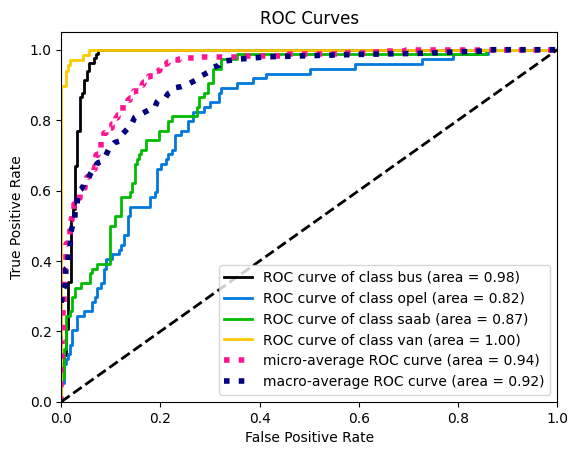

In [239]:
skpmetrics.plot_roc(y_test, pipe_est.predict_proba(X_test))

**Conslusion:** Best params differ not so much, and accuracy & F1 score are pretty the same. This means that I can use pipeline.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [240]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
pipe = Pipeline(steps=
    [('pca', pca),
    ('tree', tree)]
)

tree_param_grid = {
    'tree__max_depth': list(range(1, 31)),
    'tree__splitter': ['best', 'random']
}

clf = model_selection.GridSearchCV(pipe, tree_param_grid)
clf.fit(X_train, y_train)

print("Best params:", clf.best_params_)

tree_pipe_est = clf.best_estimator_
y_test_pred = tree_pipe_est.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("F1 score:", metrics.f1_score(y_test, y_test_pred, average='macro'))

Best params: {'tree__max_depth': 19, 'tree__splitter': 'best'}
Accuracy: 0.632996632996633
F1 score: 0.6305073607367098


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

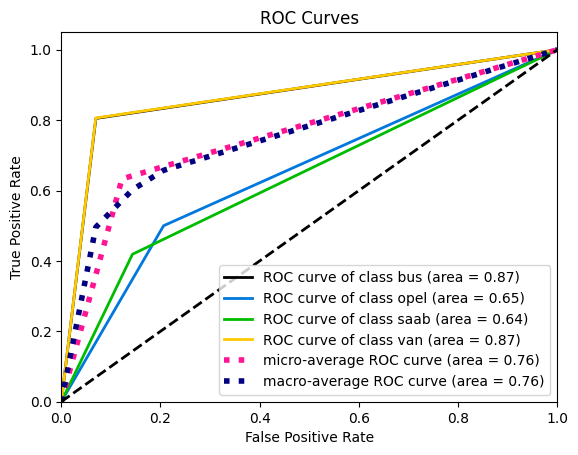

In [241]:
tree__max_depth = clf.best_params_['tree__max_depth']
skpmetrics.plot_roc(y_test, tree_pipe_est.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [242]:
N_min = 2
N_max = 100
step = 5

def gen_bootstrap(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    idx = np.random.randint(0, len(X), len(X))
    return X[idx], y[idx]

# dbgprint(gen_bootstrap(X_train, y_train))

X_train_bs, y_train_bs = [], []
for _ in range(N_max):
    X, y = gen_bootstrap(X_train, y_train)
    X_train_bs.append(X)
    y_train_bs.append(y)

In [243]:
logit_pipe_insts = []

for i in range(N_max):
    logit = LogisticRegression(multi_class='multinomial', 
                           solver='saga', 
                           tol=1e-3, 
                           max_iter=500,
                           penalty=logit__penalty,
                           C=logit__C)
                           
    logit_pipe_new = Pipeline(steps=
                        [('pca', pca),
                        ('logit', logit)])

    logit_pipe_new.fit(X_train_bs[i], y_train_bs[i])
    logit_pipe_insts.append(logit_pipe_new)

In [247]:
logit_pipe_y_test_proba = []

for i in range(N_max):
    logit_pipe_y_test_proba.append(logit_pipe_insts[i].predict_proba(X_test))

dbgprint(logit_pipe_y_test_proba)

accuracy = []
f1 = []

for ens_size in range(N_min, N_max, step):
    y_test_proba_ens = np.mean(logit_pipe_y_test_proba[:ens_size], axis=0)
    y_test_ens = logit_pipe_insts[0].classes_[[np.argmax(y) for y in y_test_proba_ens]]
    if ens_size == N_min: dbgprint(y_test_proba_ens)
    if ens_size == N_min: dbgprint(y_test_ens)

    accuracy_ens = metrics.accuracy_score(y_test_ens, y_test)
    f1_ens = metrics.f1_score(y_test_ens, y_test, average='macro')
    if ens_size == N_min: dbgprint(accuracy_ens, f1_ens)
    accuracy.append(accuracy_ens)
    f1.append(f1_ens)    

dbgprint(f1)
dbgprint(accuracy)

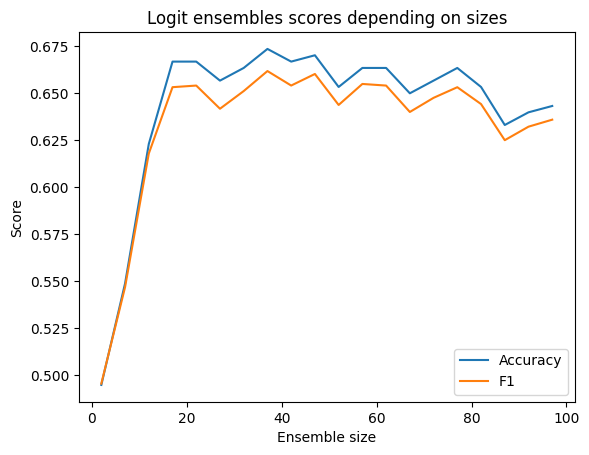

In [248]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Logit ensembles scores depending on sizes")
plt.xlabel("Ensemble size")
plt.ylabel("Score")
plt.plot(np.arange(N_min, N_max, step), accuracy, label='Accuracy')
plt.plot(np.arange(N_min, N_max, step), f1, label='F1')
plt.legend()
plt.show()

In [249]:
from sklearn.ensemble import BaggingClassifier

accuracy = []
f1 = []

for ens_size in range(N_min, N_max, step):
    logit = LogisticRegression(multi_class='multinomial', 
                           solver='saga', 
                           tol=1e-3, 
                           max_iter=500,
                           penalty=logit__penalty,
                           C=logit__C)
                           
    logit_pipe_new = Pipeline(steps=
                        [('pca', pca),
                        ('logit', logit)])
    
    ens = BaggingClassifier(logit_pipe_new, ens_size, n_jobs=-1)
    ens.fit(X_train, y_train)
    y_test_ens = ens.predict(X_test)
    accuracy_ens = metrics.accuracy_score(y_test_ens, y_test)
    f1_ens = metrics.f1_score(y_test_ens, y_test, average='macro')
    accuracy.append(accuracy_ens)
    f1.append(f1_ens) 

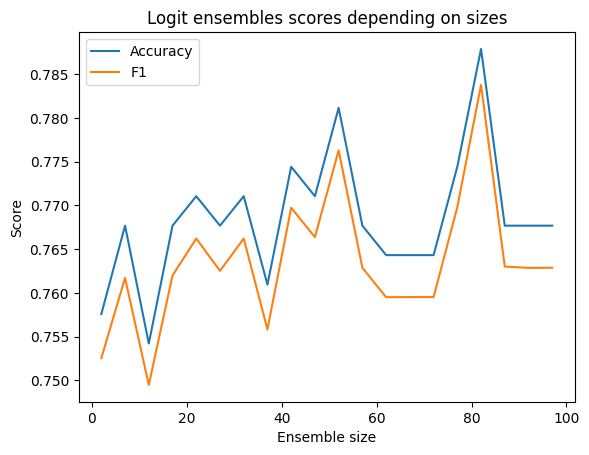

In [250]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Logit ensembles scores depending on sizes")
plt.xlabel("Ensemble size")
plt.ylabel("Score")
plt.plot(np.arange(N_min, N_max, step), accuracy, label='Accuracy')
plt.plot(np.arange(N_min, N_max, step), f1, label='F1')
plt.legend()
plt.show()

My attempt to make ensebles came out worse that sklearn... So then I will use sklearn Bagging Clasifier.

In [251]:
accuracy = []
f1 = []

for ens_size in range(N_min, N_max, step):
    tree = DecisionTreeClassifier(max_depth = tree__max_depth)
                           
    tree_pipe_new = Pipeline(steps=
                        [('pca', pca),
                        ('tree', tree)])
    
    ens = BaggingClassifier(tree_pipe_new, ens_size, n_jobs=-1)
    ens.fit(X_train, y_train)
    y_test_ens = ens.predict(X_test)
    accuracy_ens = metrics.accuracy_score(y_test_ens, y_test)
    f1_ens = metrics.f1_score(y_test_ens, y_test, average='macro')
    accuracy.append(accuracy_ens)
    f1.append(f1_ens) 

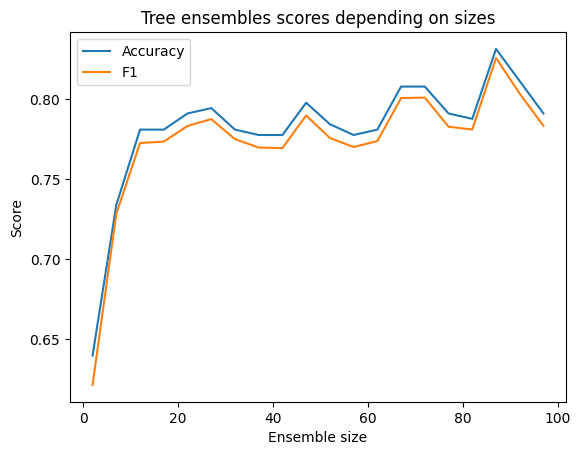

In [252]:
plt.figure()
plt.title("Tree ensembles scores depending on sizes")
plt.xlabel("Ensemble size")
plt.ylabel("Score")
plt.plot(np.arange(N_min, N_max, step), accuracy, label='Accuracy')
plt.plot(np.arange(N_min, N_max, step), f1, label='F1')
plt.legend()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [253]:
from sklearn.ensemble import RandomForestClassifier

f1 = []
accuracy = []

for forest_size in range(N_min, N_max, step):
    forest = RandomForestClassifier(n_estimators=forest_size, max_depth=tree__max_depth)
    forest.fit(X_train, y_train)
    y_test_forest = forest.predict(X_test)
    accuracy_forest = metrics.accuracy_score(y_test_forest, y_test)
    f1_forest = metrics.f1_score(y_test_forest, y_test, average='macro')
    accuracy.append(accuracy_forest)
    f1.append(f1_forest) 
    

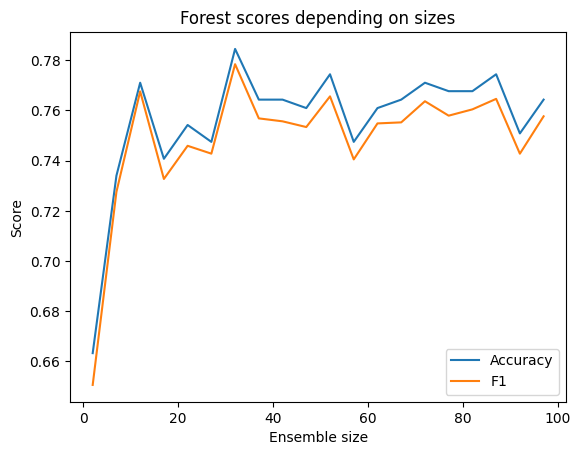

In [254]:
plt.figure()
plt.title("Forest scores depending on sizes")
plt.xlabel("Ensemble size")
plt.ylabel("Score")
plt.plot(np.arange(N_min, N_max, step), accuracy, label='Accuracy')
plt.plot(np.arange(N_min, N_max, step), f1, label='F1')
plt.legend()
plt.show()

forest__n_estimators = list(range(N_min, N_max, step))[np.argmax(f1)]
dbgprint(forest__n_estimators)

The curves are pretty similar, so we can choose any N > 20. Similarity of curves means that these approaches are prety similar.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

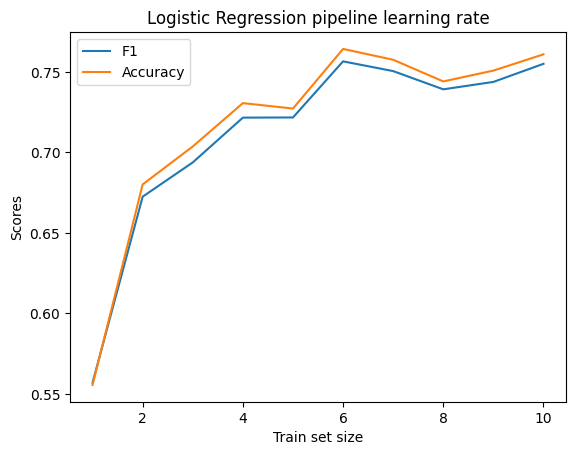

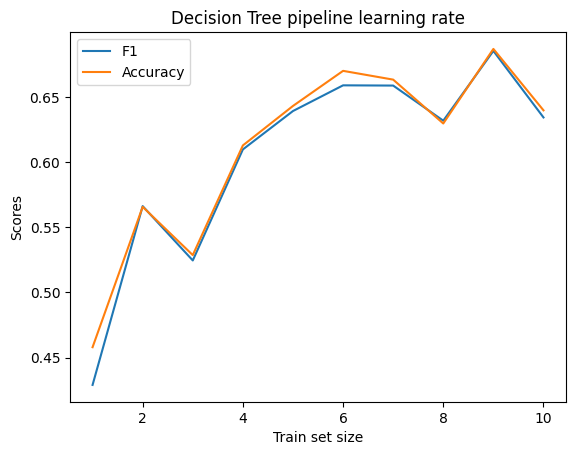

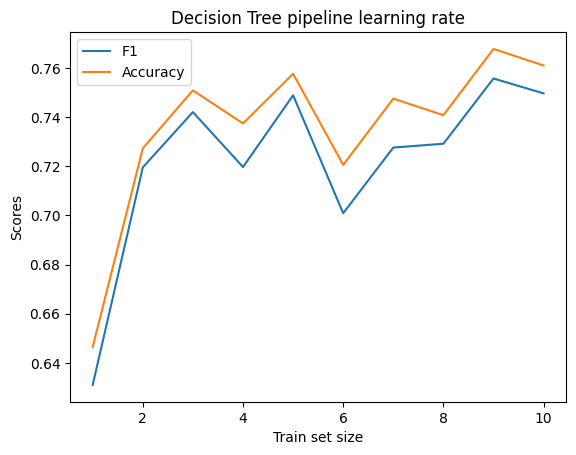

In [255]:
def learning_curve(estimator, title: str):
    f1 = []
    accuracy = []
    subsize = int(len(X_train) / 10)

    for i in range(1, 11):
        new_estimator = estimator
        size = i * subsize
        new_estimator.fit(X_train[:size], y_train[:size])
        y_test_est = new_estimator.predict(X_test)
        accuracy_est = metrics.accuracy_score(y_test_est, y_test)
        f1_est = metrics.f1_score(y_test_est, y_test, average='macro')
        accuracy.append(accuracy_est)
        f1.append(f1_est)
    
    plt.figure()
    plt.title(title + ' learning rate')
    plt.xlabel('Train set size')
    plt.ylabel('Scores')
    plt.plot(np.arange(1, 11), f1, label='F1')
    plt.plot(np.arange(1, 11), accuracy, label='Accuracy')
    plt.legend()
    plt.show()

learning_curve(Pipeline(steps=[
    ('pca', pca),
    ('logit', LogisticRegression(multi_class='multinomial', 
                           solver='saga', 
                           tol=1e-3, 
                           max_iter=500,
                           penalty=logit__penalty,
                           C=logit__C))]
), 'Logistic Regression pipeline')

learning_curve(Pipeline(steps=[
    ('pca', pca),
    ('tree', DecisionTreeClassifier(max_depth=tree__max_depth))]
), 'Decision Tree pipeline')

learning_curve(RandomForestClassifier(
    n_estimators=forest__n_estimators,
    max_depth=tree__max_depth), 'Decision Tree pipeline')

**Conclusion:** it may sound obvious, but the more data, the more accurate the predictions are.